# EDA

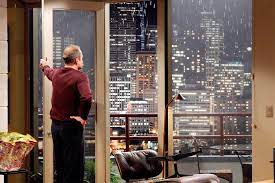

## The Stakeholder
**Larry Sanders - 42 years old, married, 2 kids**

He wants to buy a house for him and his family in Kings County, Washingtion USA. 

He listed the following **criteria** for his new house:
1) The house should have a waterfront view.
2) The house should be isolated, but still central (ideally without many kids around)
3) Since he is going to live there with his kids, the house needs enough space, e.g. bathrooms and bedrooms.

However, Larry has a limited **budget**. He cannot afford houses with pricing higher than 1.5 M$.

## Aims and Scope
We need to recommend a set of houses to Larry which best fit his criteria. At the same time, we need to take into consideration limiting factors, particularly his limited budget.

We will perform exploratory data analysis on the available houses in King County to select and recommend those house which are closest to Larry´s expectations. To to so, we first derive research questions and hypothesis to guide our analysis strategy.

Data analysis will be performed depending on the following criteria: 
* availability of waterfront views, centralized location, number of bed- and bathrooms, housing price

## Research Questions and Hypotheses

**1) What is the availability and price of houses with a waterfront view?**
    
* Houses with waterfront are less common than those without.
* Houses with waterfront are more expensive than those without.

**2) What is the price of houses in centralized neighborhoods?**

* Houses in centralized neighborhoods are more expensive than at other sites.

**3) How does the number of bed- and bathrooms affect housing price?**

* Housing prices will increase with increasing number of bed- and bathrooms.

**4) What houses can be recommended based on those criteria?**

* There are no houses meeting up with all criteria 
* (e.g. no houses with waterfront view located at the city center).

## Data Preprocessing

### Import packages and load data

In [1]:
# packages
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# data
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


### Examine, preprocess and clean data

In [3]:
# extract number of houses and number of house attributes (i.e. columns)
print(f'The dataset contains information about {df.shape[0]} houses and {df.shape[1]} columns')

The dataset contains information about 21597 houses and 21 columns


In [4]:
# get information about datatypes and missing values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# perform descriptive statistics on numeric columns to get an idea about the distribution pattern of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,19221.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21534.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


In [6]:
# extract the number of unique values per column to get an idea about the range of values
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [7]:
# check for duplicated rows
df.duplicated().value_counts()

False    21597
dtype: int64

1) Missings

As can be seen from the table above ('Non-Null Count'), most columns don't have missing values, with a few exceptions - specifically 'waterfront', 'views' and 'yr_renovated'. We not to choose a strategy on how to handle these missing values in case the affected columns become relevant for our exploratory analyses.

2) Datatypes

The datatypes associated with the different columns seem to mostly correct. Only the date, which is currently a string datatype, needs to be converted into a datetime object. Additionally, several numeric variables, e.g. price, bathrooms, floors, etc. are currently of type float but can be casted into int since they don´t contain floating point numbers (number of bedrooms is always of int type). Moreover, the 'waterfront' column only contains two distinct values, 0 and 1, with the majority of houses having a value = 0. Thus, this column is probably rather a category variable.

3) Duplicates

There are no housing entries occurring several times. Thus, the dataset doesn´t to be cleaned for duplicates.

In [8]:
# cast date column to datetime object
df.date = pd.to_datetime(df.date)
print(df.dtypes[0:2])
df[['id', 'date']].head()

id               int64
date    datetime64[ns]
dtype: object


,id,date
0,7129300520,2014-10-13
1,6414100192,2014-12-09
2,5631500400,2015-02-25
3,2487200875,2014-12-09
4,1954400510,2015-02-18


In [9]:
# replace NaNs in waterfront with 'missing' and convert to type category
#df.waterfront.fillna('missing', inplace=True)
df.waterfront = df.waterfront.astype('category')

In [10]:
# extract float types
float_columns = df.dtypes[df.dtypes == 'float64'].index
float_columns

Index(['price', 'bathrooms', 'floors', 'view', 'yr_renovated', 'lat', 'long'], dtype='object')

In [11]:
# drop latitude and longitude
float_columns = float_columns[:-2]
float_columns

Index(['price', 'bathrooms', 'floors', 'view', 'yr_renovated'], dtype='object')

In [12]:
# first replace NaN with -999 in view and yr_renovated, otherwise, columns cannot be casted to int type
df.view.fillna(-999, inplace=True)
df.yr_renovated.fillna(-999, inplace=True)

In [13]:
# cast float to type int for selected columns
df[float_columns] = df[float_columns].astype('int64')
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront             category
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Exploratory data analysis

### Q1: What is the availability and price of houses with a waterfront view?
##### H1.1: Houses with waterfront are less common than those without.


First, we will determine the availability of houses with a waterfront view. To this end, we will count the number of houses with and without waterfront and plot them in a countplot. Additionally, we will also count the number of houses without information on waterfront views.

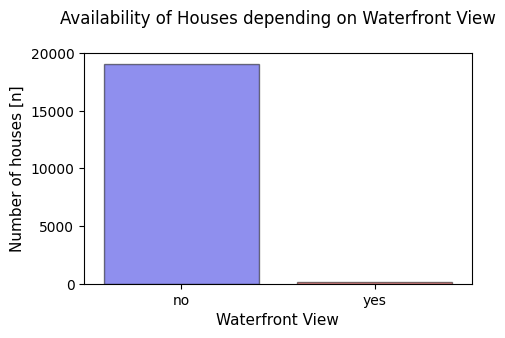

There are 19075 houses without and only 146 houses with waterfront view.
Additionally, information on waterfront view is missing for 2376 houses


In [14]:
plt.figure(figsize=(5,3))

sns.countplot(data=df, x='waterfront', 
                alpha=0.5, edgecolor='black', palette={0:'blue', 1: 'red'})
plt.ylabel('Number of houses [n]', fontsize=11)
plt.xlabel('Waterfront View', fontsize=11)
plt.xticks(ticks=np.arange(0, 2), labels=['no', 'yes'])
plt.title('Availability of Houses depending on Waterfront View\n')

plt.show()

print(f'There are {df.waterfront.value_counts()[0]} houses without and only {df.waterfront.value_counts()[1]} houses with waterfront view.')
print('Additionally, information on waterfront view is missing for', 
        df.waterfront.isna().sum(), 'houses')

The countplot depicts the number of houses with ('yes', blue) and without waterfront view ('no', red). As can be seen, there are only about 150 houses with waterfront view. Thus, these data confirm our first hypothesis and show that there are only few houses meeting the stakeholder´s first criterion.

Of note, nformation on waterfront view is missing for a total of 2.376 houses.

#### H1.2: Houses with waterfront are more expensive than those without.

Since the stakeholder has a limited budget, we next examined differences in the price between houses with and without a waterfront. To this end, we plotted the median housing price and distribution of prices and compared them between the two conditions. We chose the median since the data preprocessing showed that price values were not normally distributed and strongly skewed to the right. The distribution of prices was plotted in the form of a histogram.

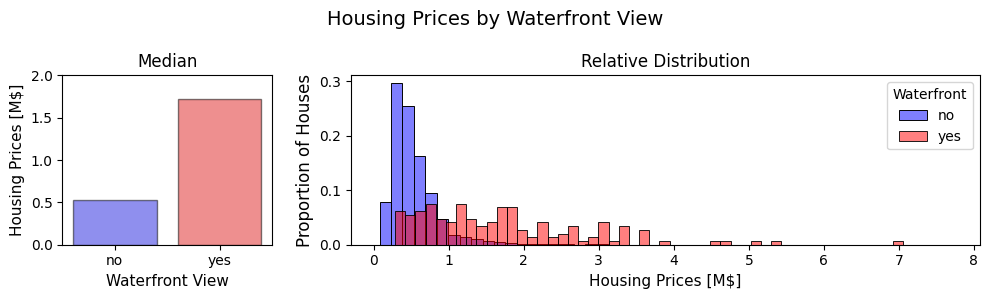

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 3]})
fig.suptitle('Housing Prices by Waterfront View', fontsize=14)

# median housing price
fig1 = sns.barplot(data=df, x='waterfront', y='price', alpha=0.5, edgecolor='black',
        errwidth=0, palette={0:'blue', 1: 'red'}, ax=ax1)
ax1.set_ylabel('Housing Prices [M$]', fontsize=11)
ax1.set_yticks(ticks=np.arange(0, 2500000, 500000), labels=np.arange(0, 2.5, 0.5).round(1))
ax1.set_xlabel('Waterfront View', fontsize=11)
ax1.set_xticks(ticks=np.arange(0, 2), labels=['no', 'yes'])
ax1.set_title('Median')

# relative distribution of housing prices
fig2 = sns.histplot(data=df[df.waterfront==0], x='price', bins=50, stat='probability',
        color='blue', alpha=0.5, label='no', ax=ax2)
fig3 = sns.histplot(data=df[df.waterfront==1], x='price', bins=50, stat='probability',
        color='red', alpha=0.5, label='yes', ax=ax2)
ax2.set_xlabel('Housing Prices [M$]', fontsize=11)
ax2.set_xticks(ticks=np.arange(0, 9000000, 1000000), labels=np.arange(0, 9))
ax2.set_ylabel('Proportion of Houses', fontsize=12)
ax2.legend(title='Waterfront')
ax2.set_title('Relative Distribution', fontsize=12)

plt.tight_layout()
plt.show()

The figure above depicts pricing differences between houses with ('yes', red) and without waterfront ('no', blue). The left-hand figure depicts the median housing price. The right-hand figure depicts the distribution of prices as a histogram. To this end, data has been binned in 50 bins. Moreover, bins are displayed as proportions relative to the total number of houses per condition, since the total number of houses with and without waterfront view strongly differed.

As can be seen from the figure, houses with waterfront view are considerably more expensive than those without, which reflected both in a higher median and a shifted pricing distribution towards higher prices, thus confirming our second hypothesis. Indeed, the majority of houses with waterfront cost more than 1.5M$, which is the stakeholder´s budget limit.

Since more than 2000 houses had missing information for waterfront, the housing price was additionally analyzed depending on its location (i.e. latiude and longitude)

In [16]:
df_missing = df.copy()
df_missing.waterfront = df.waterfront.cat.add_categories("missing").fillna("missing")
df_missing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,missing,0,...,7,1180,0.0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0.000,0,...,7,2170,400.0,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1,770,10000,1,0.000,0,...,6,770,0.0,1933,-999,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3,1960,5000,1,0.000,0,...,7,1050,910.0,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2,1680,8080,1,0.000,0,...,8,1680,0.0,1987,0,98074,47.617,-122.045,1800,7503


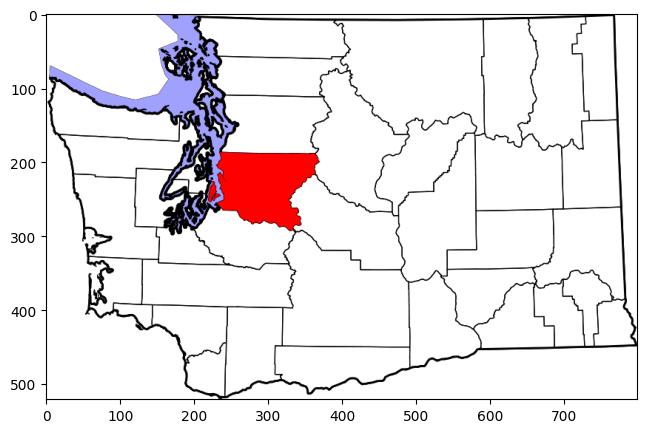

In [17]:
kingcounty_map = plt.imread('data/kingcounty_map.png')
plt.imshow(kingcounty_map)
plt.show()

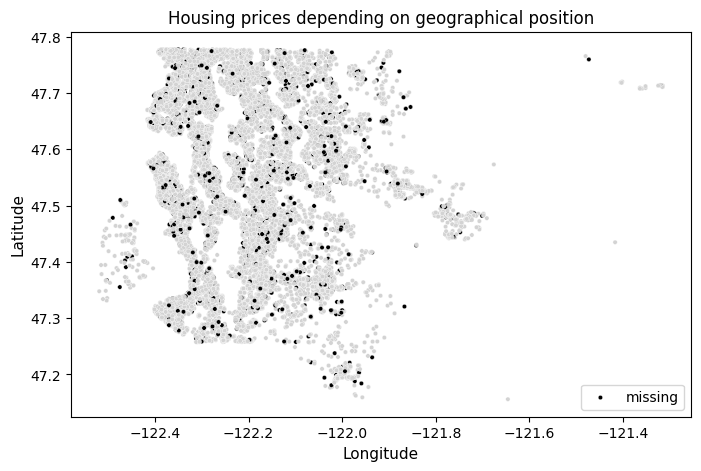

In [18]:
fig = sns.scatterplot(data=df_missing, x='long', y='lat', hue='waterfront', s=10,
            palette={0:'lightgrey', 1: 'lightgrey', 'missing': 'black'})
plt.xlabel('Longitude', fontsize=11)
plt.ylabel('Latitude', fontsize=11)
plt.legend(labels=['missing'], loc='lower right')
plt.title('Housing prices depending on geographical position')
plt.show()

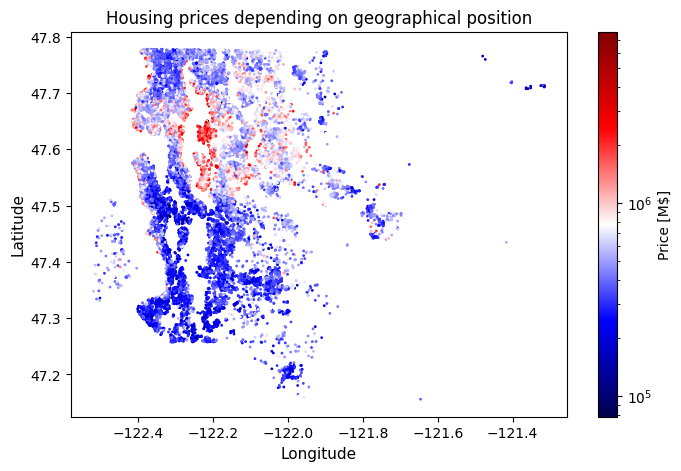

In [19]:
fig = plt.scatter(data=df, x='long', y='lat', c='price', s=1, 
        cmap='seismic', norm=colors.LogNorm(df.price.min(), df.price.max()))
cbar = plt.colorbar(fig, label='Price [M$]')
plt.xlabel('Longitude', fontsize=11)
plt.ylabel('Latitude', fontsize=11)
plt.title('Housing prices depending on geographical position')
plt.show()

In [20]:
# using px.scatter_geo from plotly.express
geo_fig = px.scatter_geo(data_frame=df, lat='lat', lon='long', scope='usa',
            color='price',
            hover_name='id', fitbounds='locations',
            title='Spatial Locations of Houses with Waterfront View')

geo_fig.update_traces(marker=dict(size=2, opacity=0.7),
                selector=dict(mode='markers'))

geo_fig.update_geos(visible=False,
                    showcoastlines=True, coastlinecolor='black',
                    showland=True, landcolor='LightGrey',
                    showocean=True, oceancolor='Blue',
                    showlakes=True, lakecolor='Blue',
                    showrivers=True, rivercolor='Blue')

geo_fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})

geo_fig.show()

The stakeholder only has a limited budget. However, the figure above shows that the median price is considerably higher for houses with waterfront compared to those without. Additionally, distribution of prices for houses wih waterfront is strongly shifted to the Mio Dollar range. Given his limited budget, the stakeholer should maybe reconsider his preferences.

### Q2: What is the availability and price of houses in the city center?

#### H2.1: Houses in centralized neighborhoods are more expensive than at other sites.

First, we need a readout for centrally located houses. Cities in King Couty are typically located at the coastline. To this end, we checked again the geographical distribution of houses on a geospatial map in order to extract criteria for defining houses with and without central locations. 

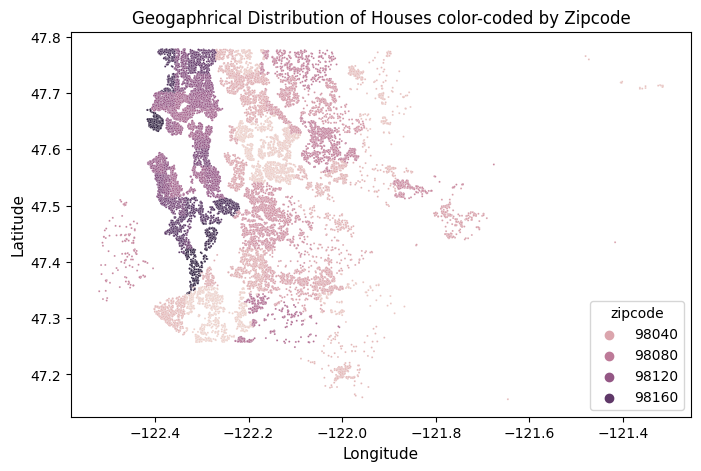

In [21]:
fig = sns.scatterplot(data=df_missing, x='long', y='lat', hue='zipcode', s=2)
plt.xlabel('Longitude', fontsize=11)
plt.ylabel('Latitude', fontsize=11)
plt.title('Geogaphrical Distribution of Houses color-coded by Zipcode')
plt.show()

The figure above illustrates the geospatial distribution of houses according to longitude and latitude, with houses color-coded by zipcode. Compared to geospatial maps for this area, it becomes apparent that houses with longitude values between -122.4 and -122.1 and latitude values between 47.4 and 47.8 are associated in city areas, in close proximity to the ocean or Lake Washington. Houses with those values can be considered centralized while the remainder can be considered not central.

Based on these values, we designed a new feature column coding if a house is located central or not.

In [22]:
# compute new column based on longitude and latitude criteria defined above
df['centralized'] = np.where(((df.long <= -122.1) & (df.long >= -122.4) 
                        & (df.lat >= 47.4) & (df.lat <= 47.8)),
                        1, 0)

In [23]:
# check if minimum values per condition are correct
df[['lat', 'long', 'centralized']].groupby('centralized').min()

,lat,long
centralized,,
0,47.156,-122.519
1,47.400,-122.400


In [24]:
# check if maximum values per condition are correct
df[['lat', 'long', 'centralized']].groupby('centralized').max()

,lat,long
centralized,,
0,47.776,-121.315
1,47.778,-122.100


We then compared to prices between houses with and without central locations. Because of the skewness of the price data, we plotted both the median value and the distribution of prices for those houses.

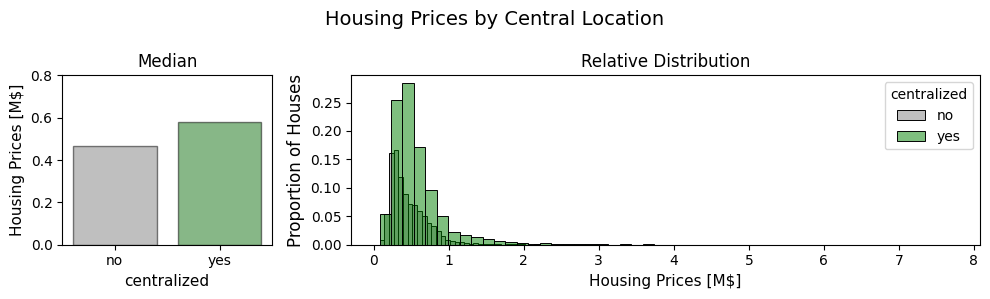

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 3]})
fig.suptitle('Housing Prices by Central Location', fontsize=14)

# median housing price
fig1 = sns.barplot(data=df, x='centralized', y='price', alpha=0.5, edgecolor='black',
        errwidth=0, palette={0:'grey', 1: 'green'}, ax=ax1)
ax1.set_ylabel('Housing Prices [M$]', fontsize=11)
ax1.set_yticks(ticks=np.arange(0, 900000, 200000), labels=np.arange(0, 0.9, 0.2).round(1))
ax1.set_xlabel('centralized', fontsize=11)
ax1.set_xticks(ticks=np.arange(0, 2), labels=['no', 'yes'])
ax1.set_title('Median')

# relative distribution of housing prices
fig2 = sns.histplot(data=df[df.centralized==0], x='price', bins=50, stat='probability',
        color='grey', alpha=0.5, label='no', ax=ax2)
fig3 = sns.histplot(data=df[df.centralized==1], x='price', bins=50, stat='probability',
        color='green', alpha=0.5, label='yes', ax=ax2)
ax2.set_xlabel('Housing Prices [M$]', fontsize=11)
ax2.set_xticks(ticks=np.arange(0, 9000000, 1000000), labels=np.arange(0, 9))
ax2.set_ylabel('Proportion of Houses', fontsize=12)
ax2.legend(title='centralized')
ax2.set_title('Relative Distribution', fontsize=12)

plt.tight_layout()
plt.show()

The figure above depicts pricing differences between houses with ('yes', red) and without centralized location ('no', blue). The left-hand figure depicts the median housing price. The right-hand figure depicts the distribution of prices as a histogram. To this end, data has been binned in 50 bins. Bins are displayed as proportions relative to the total number of houses per condition.

As can be seen, houses with central location are slightly more expensive than those without. Specifically, houses with central location have a slightly higher median price, while the pricing distribution is largely comparable between conditions. These results thus do not confirm our hypothesis. Thus, centralized locations do not seem to be a limited factor when recommending houses to the stakeholder. However, it should be considered that the centrality of houses could only approximated with latitude and longitude information. Additional information might be collected for more robust conclusions.

### Q3: How does the number of bed- and bathrooms affect housing price?
#### H3.1: Housing prices will increase with increasing number of bed- and bathrooms.

Since the stakeholder has kids, he houses to be recommended to the stakeholder need to have enough space to accommodate his family. Thus, we analyzed the relationship of the number of bedrooms and bathrooms with housing price to examine whether there are houses with enough space within the stakeholder´s budget limit. To this end, we plotted the relationship between these features and housing price in the form of scatterplots. Data was plotted separately for houses with and without waterfront views to assess whether there are houses available that meet up with the stakeholder´s criteria both in terms of waterfront property as well as room number.

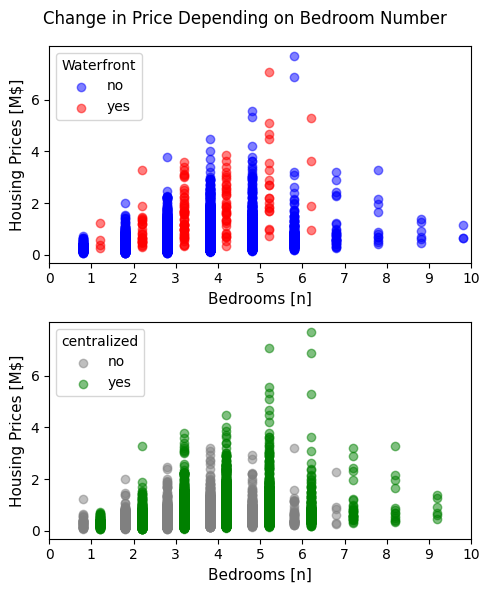

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))
plt.suptitle('Change in Price Depending on Bedroom Number')

ax1.scatter(x=df[df.waterfront==0].bedrooms-0.2, y=df[df.waterfront==0].price, alpha=0.5,
            color='blue', label='no')
ax1.scatter(x=df[df.waterfront==1].bedrooms+0.2, y=df[df.waterfront==1].price, alpha=0.5,
            color='red', label='yes')
ax1.set_ylabel('Housing Prices [M$]', fontsize=11)
ax1.set_yticks(ticks=np.arange(0, 8000000, 2000000), labels=np.arange(0, 8, 2))
ax1.set_xlabel('Bedrooms [n]', fontsize=11)
ax1.set_xticks(ticks=np.arange(0, 11, 1))
ax1.set_xlim(0, 10)
ax1.legend(title='Waterfront', loc='upper left')

ax2.scatter(x=df[df.centralized==0].bedrooms-0.2, y=df[df.centralized==0].price, alpha=0.5,
            color='grey', label='no')
ax2.scatter(x=df[df.centralized==1].bedrooms+0.2, y=df[df.centralized==1].price, alpha=0.5,
            color='green', label='yes')
ax2.set_ylabel('Housing Prices [M$]', fontsize=11)
ax2.set_yticks(ticks=np.arange(0, 8000000, 2000000), labels=np.arange(0, 8, 2))
ax2.set_xlabel('Bedrooms [n]', fontsize=11)
ax2.set_xticks(ticks=np.arange(0, 11, 1))
ax2.set_xlim(0, 10)
ax2.legend(title='centralized', loc='upper left')

plt.tight_layout()
plt.show()

The figure shows the relationship between the number of bedrooms and housing price. In the upper panel, houses are color-coded depending on whether they have ('yes', red) or don't have a waterfront ('no', blue). In the lower panel, houses are color-coded depending on whether they are located centrally ('yes', green) or not ('no', grey).

As can be seen, there is a near-linear increase in housing price with bedroom number up to about 5 beedrooms. Interestingly, for houses without waterfront view and those with central location, respectively, housing prices drop again with further increases in bedroom number,illustrating a curvilinear relationship, possibly due to a lower demand for houses with many bedrooms. Houses with waterfront views only have a maximum of 6 bedrooms, up to which only a near-linear increase is evident. 

For houses with waterfront view, there are also several cases with up to 4 bedrooms within the stakeholder´s budget limit of 1.5 M$. For houses with centralized locations, there are even examples with up to 7 bedrooms, which would be affordable by the stakeholder.

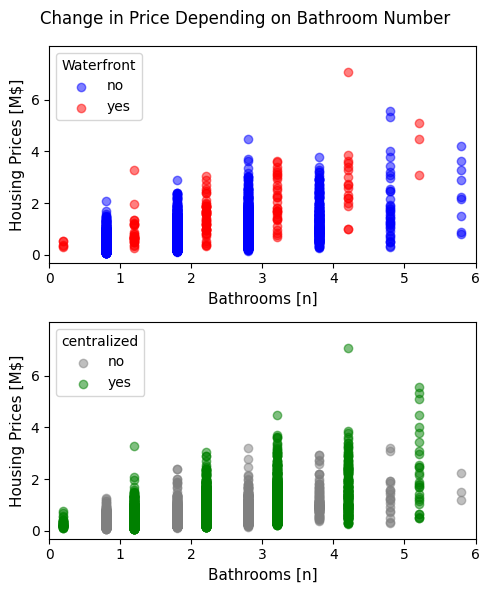

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))
plt.suptitle('Change in Price Depending on Bathroom Number')

ax1.scatter(x=df[df.waterfront==0].bathrooms-0.2, y=df[df.waterfront==0].price, alpha=0.5,
            color='blue', label='no')
ax1.scatter(x=df[df.waterfront==1].bathrooms+0.2, y=df[df.waterfront==1].price, alpha=0.5,
            color='red', label='yes')
ax1.set_ylabel('Housing Prices [M$]', fontsize=11)
ax1.set_yticks(ticks=np.arange(0, 8000000, 2000000), labels=np.arange(0, 8, 2))
ax1.set_xlabel('Bathrooms [n]', fontsize=11)
ax1.set_xticks(ticks=np.arange(0, 7, 1))
ax1.set_xlim(0, 6)
ax1.legend(title='Waterfront', loc='upper left')

ax2.scatter(x=df[df.centralized==0].bathrooms-0.2, y=df[df.centralized==0].price, alpha=0.5,
            color='grey', label='no')
ax2.scatter(x=df[df.centralized==1].bathrooms+0.2, y=df[df.centralized==1].price, alpha=0.5,
            color='green', label='yes')
ax2.set_ylabel('Housing Prices [M$]', fontsize=11)
ax2.set_yticks(ticks=np.arange(0, 8000000, 2000000), labels=np.arange(0, 8, 2))
ax2.set_xlabel('Bathrooms [n]', fontsize=11)
ax2.set_xticks(ticks=np.arange(0, 7, 1))
ax2.set_xlim(0, 6)
ax2.legend(title='centralized', loc='upper left')

plt.tight_layout()
plt.show()


The figure shows the relationship between the number of bathrooms and housing price.In the upper panel, houses are color-coded depending on whether they have ('yes', red) or don't have a waterfront ('no', blue). In the lower panel, houses are color-coded depending on whether they are located centrally ('yes', green) or not ('no', grey).

As can be seen, there is a near-linear increase in housing price with bathroom number, confirmimg our hypothesis. However, a plateau seems to be reached in housing price with about 4 bathrooms. 

For houses with waterfront view, there are also several cases with 2 bathrooms within the stakeholder´s budget limit of 1.5 M$. The same holds true for houses with centralized locations.

### Q4: What houses can be recommended based on those criteria?
#### H4.1: There are no houses meeting up with all criteria.

Finally, we filtered the dataset based on the stakeholder's criteria and limitations in order to extract a set of recommendable houses.

To get a first impression, we selected houses within the stakeholders budget limit (1.5 M$) and counted the occurrences of those houses fulfilling the criteria of being centralized and having a waterfront.

In [28]:
# filter by budget limit, group by centralized and waterfront, and count occurrences
df[df.price < 1500000].groupby(['centralized', 'waterfront']).size().to_frame('frequency')

frequency
centralized waterfront           
0           0.0              6533
            1.0                37
1           0.0             12134
            1.0                36

As can be seen from the table, there are indeed 36 houses within his price range and fulfilling both critera.

Since the house needs to accommodate this familiy, we also set a lower boundary for the number of bed- and bathrooms. Houses were additionally selected for at least three bedrooms (2 for his kids and 1 for himself and his wife) and at least one bathroom

In [29]:

df.loc[(df.price < 1500000) & (df.bedrooms >= 3) & (df.bathrooms >= 1)].groupby(['centralized', 'waterfront']).size().to_frame('frequency')

frequency
centralized waterfront           
0           0.0              6027
            1.0                18
1           0.0             10034
            1.0                24

As can be seen in the table, there are still 24 houses meeting all of his criteria.

We therefore generated a new, filtered dataset of houses that can be recommended to the stakeholder, including additional relevant information for further screening, e.g. the condition of the house, the price, the actual number of bed- and bathrooms, etc.

In [30]:
recommended_houses = df.loc[(df.price < 1500000) & (df.waterfront==1) & (df.centralized==1) &
                    (df.bedrooms >= 3) & (df.bathrooms >= 1)]
recommended_houses = recommended_houses[['id', 'price', 'condition', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'sqft_lot15']]
recommended_houses.sort_values(['price', 'condition'])

,id,price,condition,bedrooms,bathrooms,sqft_living,yr_built,sqft_lot15
18833,7631800110,380000,3,3,2,1980,1984,17313
17460,6329000185,540000,3,3,2,2600,1912,14700
13225,2623039018,685000,3,4,1,1550,1930,22047
15811,8073000491,700000,3,4,1,1950,1957,13122
16404,6329000190,750000,3,4,1,2520,1960,8100
11155,7567600030,750000,4,5,1,2640,1954,11942
11832,2623039082,770000,4,3,3,2050,1930,12200
1155,8069000075,790000,3,4,1,2460,1961,10061
15372,8073000585,840500,3,4,2,2290,1948,9379
14174,7631200085,947500,5,3,2,2980,1917,12514
